In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | novellara
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | quatre cocos
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | vieste
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | acarau
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | haverhill
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | bonfim
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | palmer
Processing Record 21 of Set 1 | khonuu
City not found. Skipping...
Processing

Processing Record 35 of Set 4 | castrillon
Processing Record 36 of Set 4 | mount isa
Processing Record 37 of Set 4 | nanortalik
Processing Record 38 of Set 4 | port lincoln
Processing Record 39 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 4 | makakilo city
Processing Record 41 of Set 4 | goundam
Processing Record 42 of Set 4 | naron
Processing Record 43 of Set 4 | santa rosalia
Processing Record 44 of Set 4 | nome
Processing Record 45 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 46 of Set 4 | pedasi
Processing Record 47 of Set 4 | calatayud
Processing Record 48 of Set 4 | port alfred
Processing Record 49 of Set 4 | kaiyuan
Processing Record 50 of Set 4 | vila franca do campo
Processing Record 1 of Set 5 | uruzgan
Processing Record 2 of Set 5 | miri
Processing Record 3 of Set 5 | tubruq
City not found. Skipping...
Processing Record 4 of Set 5 | gamba
Processing Record 5 of Set 5 | port blair
Processing Record 6 of Set 5 | qasigiann

Processing Record 25 of Set 8 | babanka
Processing Record 26 of Set 8 | thinadhoo
Processing Record 27 of Set 8 | port macquarie
Processing Record 28 of Set 8 | manitouwadge
Processing Record 29 of Set 8 | rabo de peixe
Processing Record 30 of Set 8 | biltine
Processing Record 31 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 32 of Set 8 | san policarpo
Processing Record 33 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 34 of Set 8 | maceio
Processing Record 35 of Set 8 | hami
Processing Record 36 of Set 8 | ayan
Processing Record 37 of Set 8 | orange
Processing Record 38 of Set 8 | hokitika
Processing Record 39 of Set 8 | humboldt
Processing Record 40 of Set 8 | areia branca
Processing Record 41 of Set 8 | altamira
Processing Record 42 of Set 8 | gerash
Processing Record 43 of Set 8 | saint george
Processing Record 44 of Set 8 | pitea
Processing Record 45 of Set 8 | xiongshi
City not found. Skipping...
Processing Record 46 of Set 8 | tema
P

Processing Record 15 of Set 12 | sindgi
Processing Record 16 of Set 12 | tianpeng
Processing Record 17 of Set 12 | svencionys
Processing Record 18 of Set 12 | marrakesh
Processing Record 19 of Set 12 | sokolo
Processing Record 20 of Set 12 | kankaanpaa
Processing Record 21 of Set 12 | kasane
Processing Record 22 of Set 12 | hasaki
Processing Record 23 of Set 12 | carinhanha
Processing Record 24 of Set 12 | vidim
Processing Record 25 of Set 12 | beaufort
Processing Record 26 of Set 12 | dudinka
Processing Record 27 of Set 12 | lacombe
Processing Record 28 of Set 12 | uhlove
Processing Record 29 of Set 12 | asau
Processing Record 30 of Set 12 | abha
Processing Record 31 of Set 12 | do rud
City not found. Skipping...
Processing Record 32 of Set 12 | itoman
Processing Record 33 of Set 12 | umm kaddadah
Processing Record 34 of Set 12 | muros
Processing Record 35 of Set 12 | cidreira
Processing Record 36 of Set 12 | bara
Processing Record 37 of Set 12 | novikovo
Processing Record 38 of Set 1

In [10]:
# Counting the total number of records retrieved
len(city_data)

575

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,57.78,69,91,26.33,NZ,2022-03-23 22:09:08
1,Novellara,44.8430,10.7275,53.01,55,0,4.50,IT,2022-03-23 22:14:03
2,Albany,42.6001,-73.9662,46.94,39,100,4.00,US,2022-03-23 22:07:57
3,Quatre Cocos,-20.2078,57.7625,80.10,82,69,13.85,MU,2022-03-23 22:14:04
4,Rikitea,-23.1203,-134.9692,79.97,70,52,14.72,PF,2022-03-23 22:08:51
5,Vieste,41.8825,16.1750,52.61,67,0,13.58,IT,2022-03-23 22:14:04
6,Torbay,47.6666,-52.7314,30.76,88,75,10.36,CA,2022-03-23 22:14:05
7,Acarau,-2.8856,-40.1200,77.86,84,100,10.09,BR,2022-03-23 22:14:05
8,Cape Town,-33.9258,18.4232,70.12,79,33,14.74,ZA,2022-03-23 22:08:49
9,Haverhill,42.7762,-71.0773,50.36,52,75,8.05,US,2022-03-23 22:14:06


In [16]:
# Reordering the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-03-23 22:09:08,-46.6000,168.3333,57.78,69,91,26.33
1,Novellara,IT,2022-03-23 22:14:03,44.8430,10.7275,53.01,55,0,4.50
2,Albany,US,2022-03-23 22:07:57,42.6001,-73.9662,46.94,39,100,4.00
3,Quatre Cocos,MU,2022-03-23 22:14:04,-20.2078,57.7625,80.10,82,69,13.85
4,Rikitea,PF,2022-03-23 22:08:51,-23.1203,-134.9692,79.97,70,52,14.72
5,Vieste,IT,2022-03-23 22:14:04,41.8825,16.1750,52.61,67,0,13.58
6,Torbay,CA,2022-03-23 22:14:05,47.6666,-52.7314,30.76,88,75,10.36
7,Acarau,BR,2022-03-23 22:14:05,-2.8856,-40.1200,77.86,84,100,10.09
8,Cape Town,ZA,2022-03-23 22:08:49,-33.9258,18.4232,70.12,79,33,14.74
9,Haverhill,US,2022-03-23 22:14:06,42.7762,-71.0773,50.36,52,75,8.05


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

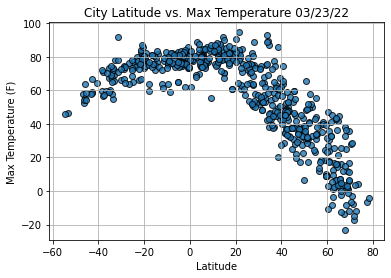

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

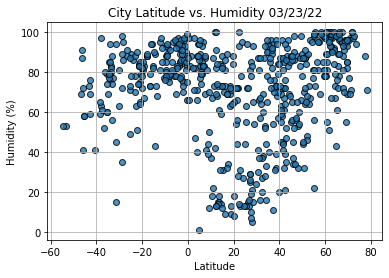

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

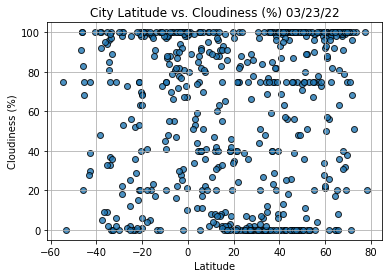

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

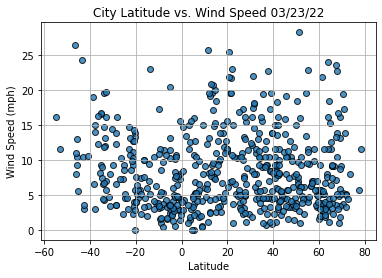

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

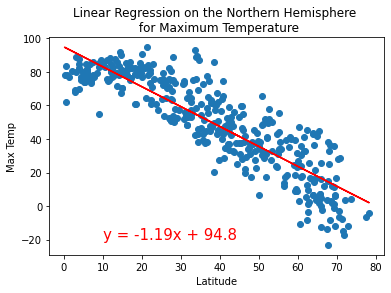

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-20))

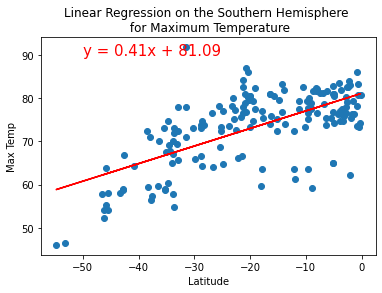

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

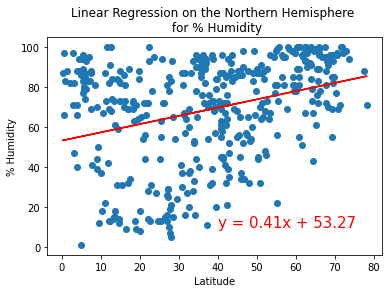

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

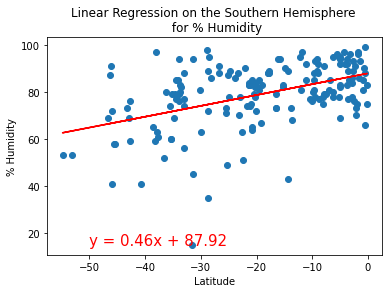

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

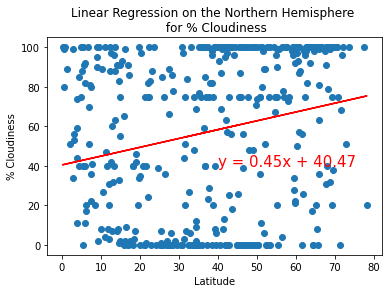

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,40))

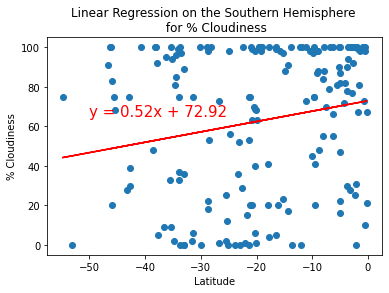

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,65))

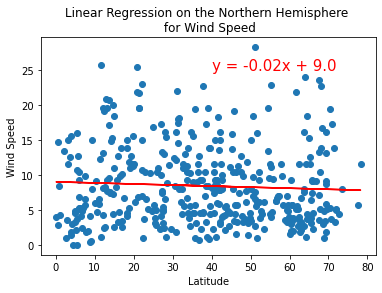

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))

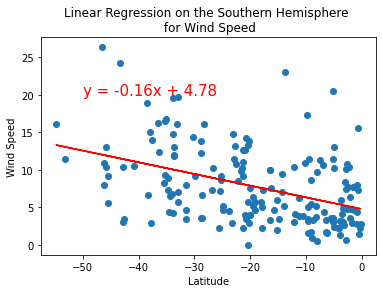

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))